In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from collections import defaultdict

SECOND = 1e12

## Process data

In [3]:
seeds = list(range(20))
X = list(range(107))

In [4]:
# no ACP
logfile = 'line2,ma=0,up=False,ns={},qs=0,s=freshest,pf=False'

data_ma0_tts = defaultdict(list)
data_ma0_fid = defaultdict(list)
for s in seeds:
    with open(logfile.format(s), 'r') as f:
        for line in f:
            if 'time to serve' in line:
                line = line.split()
                tts = line[13]  # time to serve
                i, j = tts.find('='), -1
                tts = float(tts[i+1:j])
                fidelity = line[14]
                i, j = fidelity.find('='), len(fidelity)
                fidelity = float(fidelity[i+1:j])
                data_ma0_tts[s].append(tts)
                data_ma0_fid[s].append(fidelity)
        
y_ma0_tts = []
y_ma0_fid = []
for x in X:
    datapoints = []
    for s in seeds:
        datapoints.append(data_ma0_tts[s][x])
    y_ma0_tts.append(np.average(datapoints))
    
    datapoints = []
    for s in seeds:
        datapoints.append(data_ma0_fid[s][x])
    y_ma0_fid.append(np.average(datapoints))

print(np.average(y_ma0_tts), np.average(y_ma0_fid))

5.951887206261682 0.9498600000000005


In [5]:
# no purify + freshest
logfile = 'line2,ma=5,up=False,ns={},qs=0,s=freshest,pf=False'

data_ma5_freshest_tts = defaultdict(list)
data_ma5_freshest_fid = defaultdict(list)
for s in seeds:
    with open(logfile.format(s), 'r') as f:
        for line in f:
            if 'time to serve' in line:
                line = line.split()
                tts = line[13]  # time to serve
                i, j = tts.find('='), -1
                tts = float(tts[i+1:j])
                fidelity = line[14]
                i, j = fidelity.find('='), len(fidelity)
                fidelity = float(fidelity[i+1:j])
                data_ma5_freshest_tts[s].append(tts)
                data_ma5_freshest_fid[s].append(fidelity)

y_ma5_nopurify_tts = []
y_ma5_nopurify_fid = []
for x in X:
    datapoints = []
    for s in seeds:
        datapoints.append(data_ma5_freshest_tts[s][x])
    y_ma5_nopurify_tts.append(np.average(datapoints))
    
    datapoints = []
    for s in seeds:
        datapoints.append(data_ma5_freshest_fid[s][x])
    y_ma5_nopurify_fid.append(np.average(datapoints))

print(np.average(y_ma5_nopurify_tts), np.average(y_ma5_nopurify_fid))

0.2999999999999999 0.9426309285046727


In [6]:
# no purify + random
logfile = 'line2,ma=5,up=False,ns={},qs=0,s=random,pf=False'

data_ma5_random_tts = defaultdict(list)
data_ma5_random_fid = defaultdict(list)
for s in seeds:
    with open(logfile.format(s), 'r') as f:
        for line in f:
            if 'time to serve' in line:
                line = line.split()
                tts = line[13]  # time to serve
                i, j = tts.find('='), -1
                tts = float(tts[i+1:j])
                fidelity = line[14]
                i, j = fidelity.find('='), len(fidelity)
                fidelity = float(fidelity[i+1:j])
                data_ma5_random_tts[s].append(tts)
                data_ma5_random_fid[s].append(fidelity)

y_ma5_nopurify_random_tts = []
y_ma5_nopurify_random_fid = []
for x in X:
    datapoints = []
    for s in seeds:
        datapoints.append(data_ma5_random_tts[s][x])
    y_ma5_nopurify_random_tts.append(np.average(datapoints))
    
    datapoints = []
    for s in seeds:
        datapoints.append(data_ma5_random_fid[s][x])
    y_ma5_nopurify_random_fid.append(np.average(datapoints))

print(np.average(y_ma5_nopurify_random_tts), np.average(y_ma5_nopurify_random_fid))

0.2999999999999999 0.9369744191588785


In [7]:
# has purify

logfile = 'line2,ma=5,up=False,ns={},qs=0,s=freshest,pf=True'

data_ma5_tts = defaultdict(list)
data_ma5_fid = defaultdict(list)
for s in seeds:
    with open(logfile.format(s), 'r') as f:
        for line in f:
            if 'time to serve' in line:
                line = line.split()
                tts = line[13]  # time to serve
                i, j = tts.find('='), -1
                tts = float(tts[i+1:j])
                fidelity = line[14]
                i, j = fidelity.find('='), len(fidelity)
                fidelity = float(fidelity[i+1:j])
                data_ma5_tts[s].append(tts)
                data_ma5_fid[s].append(fidelity)

y_ma5_purify_tts = []
y_ma5_purify_fid = []
for x in X:
    datapoints = []
    for s in seeds:
        try:
            datapoints.append(data_ma5_tts[s][x])
        except:
            print(f'x={x}, s={s}')
    y_ma5_purify_tts.append(np.average(datapoints))
    
    datapoints = []
    for s in seeds:
        try:
            datapoints.append(data_ma5_fid[s][x])
        except:
            print(f'x={x}, s={s}')
    y_ma5_purify_fid.append(np.average(datapoints))

print(np.average(y_ma5_purify_tts), np.average(y_ma5_purify_fid))

0.3912624309205608 0.9549139186915889


In [8]:
def avg(y: list, length: int) -> list:
    '''sliding window avg'''
    avg = []
    for i in range(length, len(y) + 1):
        avg.append(np.average(y[i-length:i]))
    return avg

## TTS

In [9]:
X = list(range(100))
length = 4

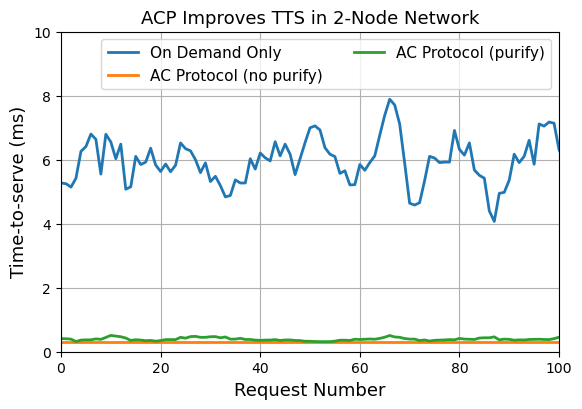

In [10]:
fig, ax = plt.subplots(figsize=(6,4))
fig.subplots_adjust(left=0.13, right=0.96, bottom=0.12, top=0.92)
ax.plot(avg(y_ma0_tts, length), label=f'On Demand Only', linewidth=2)
ax.plot(avg(y_ma5_nopurify_tts, length), label=f'AC Protocol (no purify)', linewidth=2)
ax.plot(avg(y_ma5_purify_tts, length), label=f'AC Protocol (purify)', linewidth=2)
ax.legend(ncols=2, fontsize=11)
# xticks = list(range(0, 10))
# ax.set_xticks(xticks)
ax.grid()
ax.set_xlim([0, 100])
ax.set_ylim([0, 10])
ax.set_xlabel('Request Number', fontsize=13)
ax.set_ylabel('Time-to-serve (ms)', fontsize=13)

ax.set_title('ACP Improves TTS in 2-Node Network', fontsize=13)
fig.savefig("2node-tts.png")

## Fidelity

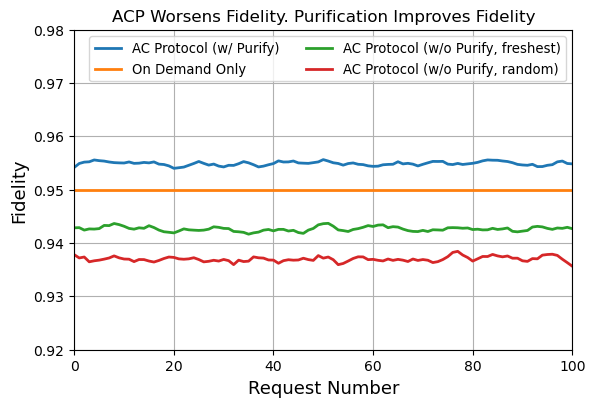

In [11]:
fig, ax = plt.subplots(figsize=(6,4))
fig.subplots_adjust(left=0.13, right=0.96, bottom=0.12, top=0.92)
ax.plot(avg(y_ma5_purify_fid, length), label=f'AC Protocol (w/ Purify)', linewidth=2)
ax.plot(avg(y_ma0_fid, length), label=f'On Demand Only', linewidth=2)
ax.plot(avg(y_ma5_nopurify_fid, length), label=f'AC Protocol (w/o Purify, freshest)', linewidth=2)
ax.plot(avg(y_ma5_nopurify_random_fid, length), label=f'AC Protocol (w/o Purify, random)', linewidth=2)

ax.legend(fontsize=9.5, ncols=2)
ax.grid()
ax.set_xlim([0, 100])
ax.set_ylim([0.92, 0.98])
ax.set_xlabel('Request Number', fontsize=13)
ax.set_ylabel('Fidelity', fontsize=13)
ax.set_title('ACP Worsens Fidelity. Purification Improves Fidelity', fontsize=12)
fig.savefig('2node-fid.png')

# Put two plots into one plot

In [12]:
plt.rcParams['font.size'] = 25
plt.rcParams['lines.linewidth'] = 4

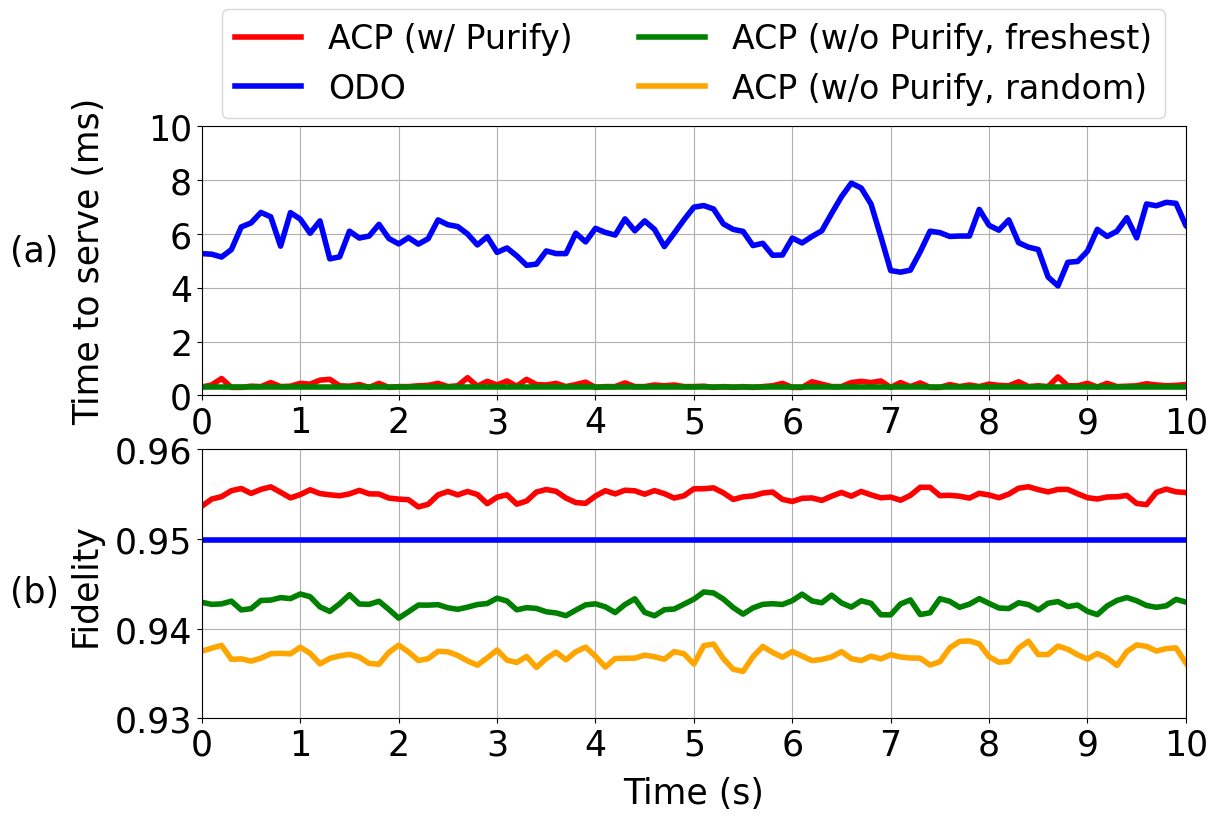

In [18]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8))
fig.subplots_adjust(top=0.85, bottom=0.11, left=0.16, right=0.98, hspace=0.2)
axes[0].plot(y_ma5_purify_tts, color='red', label='ACP (w/ Purify)')
axes[0].plot(avg(y_ma0_tts, length), color='blue', label='ODO')
axes[0].plot(y_ma5_nopurify_tts, color='green', label='ACP (w/o Purify)')
axes[0].grid()
axes[0].set_xlim((0, 100))
axes[0].set_ylim((0, 10))
axes[0].set_ylabel('Time to serve (ms)', labelpad=30)
axes[0].text(-19.5, 5, '(a)')
yticks = [0, 2, 4, 6, 8, 10]
axes[0].set_yticks(yticks)
xticks = list(range(0, 101, 10))
xticklabels = [x//10 for x in xticks]
axes[0].set_xticks(xticks)
axes[0].set_xticklabels(xticklabels)

axes[1].plot(avg(y_ma5_purify_fid, 2), color='red', label=f'ACP (w/ Purify)')
axes[1].plot(y_ma0_fid, color='blue', label=f'ODO')
axes[1].plot(avg(y_ma5_nopurify_fid, 2), color='green', label=f'ACP (w/o Purify, freshest)')
axes[1].plot(avg(y_ma5_nopurify_random_fid, 2) , color='orange', label=f'ACP (w/o Purify, random)')
axes[1].grid()
axes[1].set_xlim((0, 100))
axes[1].set_ylim((0.93, 0.96))
axes[1].set_ylabel('Fidelity', labelpad=9)
axes[1].set_xlabel('Time (s)', labelpad=10)
axes[1].legend(ncol=2, loc=(0.02, 2.23), fontsize=23.9)
axes[1].text(-19.5, 0.943, '(b)')
axes[1].set_xticks(xticks)
axes[1].set_xticklabels(xticklabels)

fig.savefig('2node.png')